In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
all_xray_df = pd.read_csv("D:/Xray_Data/data/images/Data_Entry_2017.csv")
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('D:','Xray_Data', 'data', 'images*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)

all_xray_df.sample(3)

Scans found: 112120 , Total Headers 112120


Image Index         Finding Labels  Follow-up #  Patient ID  \
74397  00018253_080.png  Effusion|Infiltration           80       18253   
99406  00026295_000.png             No Finding            0       26295   
94861  00024584_000.png             No Finding            0       24584   

       Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
74397           72              F            AP                 3056     2544   
99406           58              F            PA                 2544     3056   
94861           57              M            PA                 2494     2629   

       OriginalImagePixelSpacing[x     y]  Unnamed: 11  \
74397                        0.139  0.139          NaN   
99406                        0.139  0.139          NaN   
94861                        0.143  0.143          NaN   

                                             path  
74397  D:Xray_Data\data\images_2\00018253_080.png  
99406  D:Xray_Data\data\images_2\00026295_000.png  
94861  D:Xray_Data\data\images_2\00024584_000.png

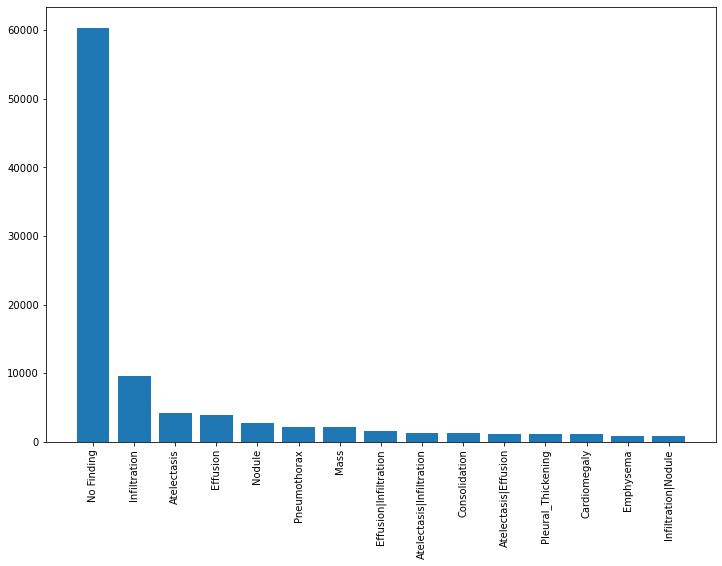

In [15]:
label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

In [16]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Image Index         Finding Labels  Follow-up #  Patient ID  \
106776  00028810_000.png                                   0       28810   
105728  00028454_010.png  Effusion|Infiltration           10       28454   
99907   00026456_000.png           Infiltration            0       26456   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
106776           27              F            PA                 1782   
105728           58              F            AP                 3056   
99907            47              F            PA                 2826   

        Height]  OriginalImagePixelSpacing[x  ...  Effusion  Emphysema  \
106776     2021                     0.194311  ...       0.0        0.0   
105728     2544                     0.139000  ...       1.0        0.0   
99907      2991                     0.143000  ...       0.0        0.0   

       Fibrosis  Hernia  Infiltration  Mass  Nodule  Pleural_Thickening  \
106776      0.0     0.0           0.0   0.0     0.0                 0.0   
105728      0.0     0.0           1.0   0.0     0.0                 0.0   
99907       0.0     0.0           1.0   0.0     0.0                 0.0   

        Pneumonia  Pneumothorax  
106776        0.0           0.0  
105728        0.0           0.0  
99907         0.0           0.0  

[3 rows x 27 columns]

In [17]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [18]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)), 
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


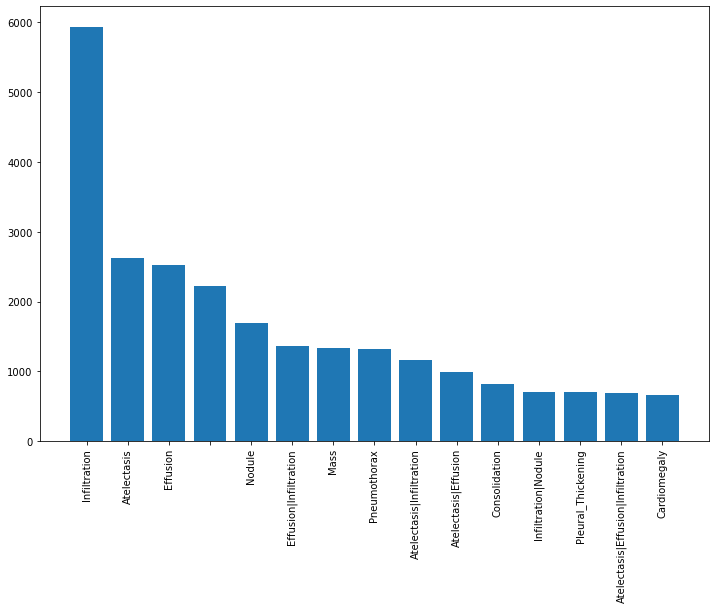

In [19]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

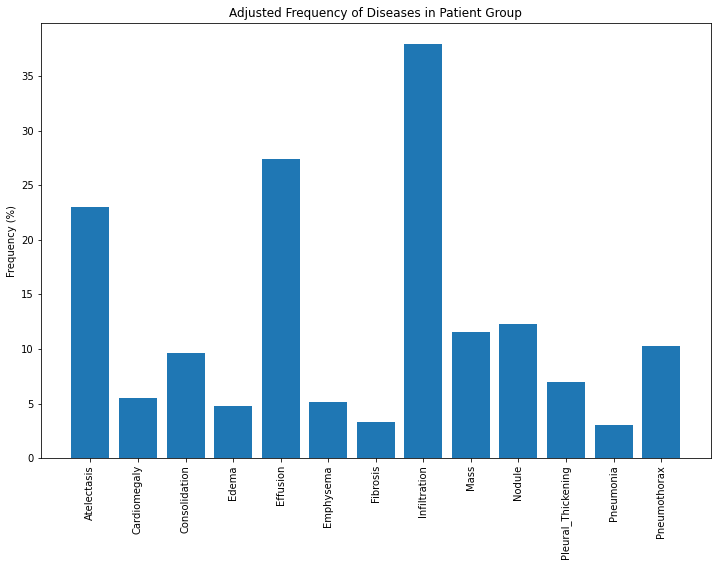

In [20]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

In [21]:
all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])


In [22]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])


train 30000 validation 10000


In [23]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)


In [24]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)


In [56]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 32)

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 256) # we can use much larger batches for evaluation

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df, 
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel', 
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'rgb',
                            batch_size = 1024))


Found 28277 validated image filenames belonging to 13 classes.
Found 9426 validated image filenames belonging to 13 classes.
Found 9426 validated image filenames belonging to 13 classes.


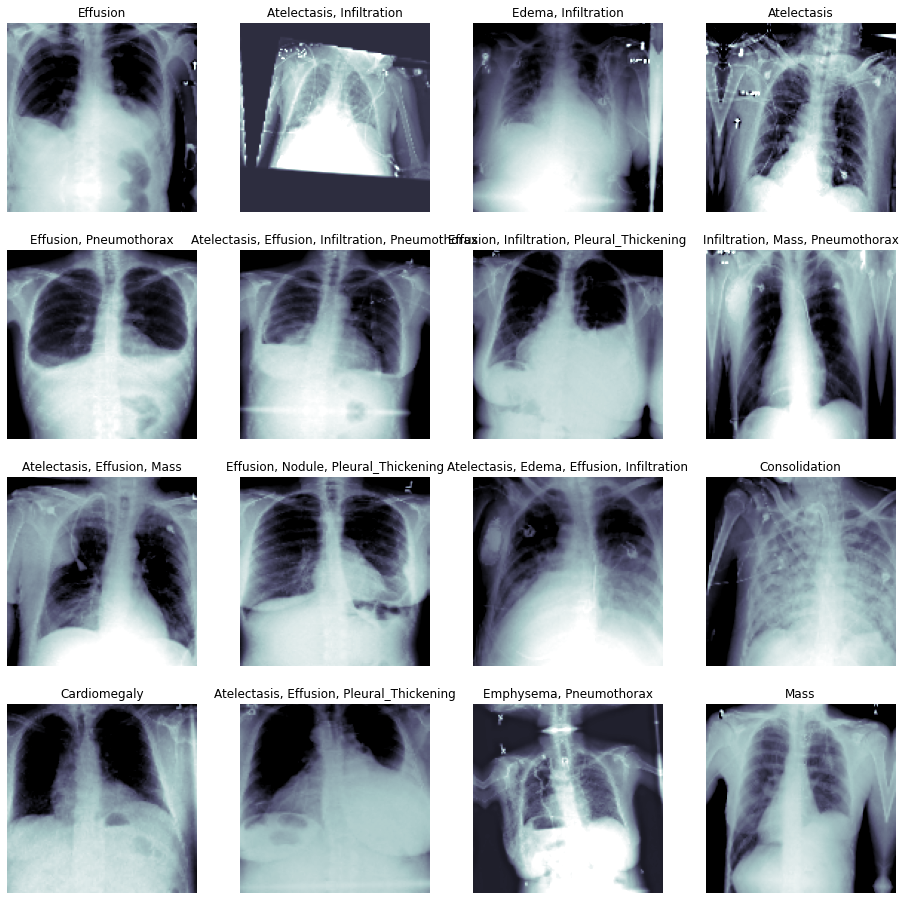

In [57]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) 
                             if n_score>0.5]))
    c_ax.axis('off')
    

In [74]:
from keras.applications.densenet import DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout


# Load the pretrained DenseNet model
base_densenet_model = DenseNet121(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Create the multi-disease model
model = Sequential()
model.add(base_densenet_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(all_labels), activation='sigmoid'))


In [75]:
model = DenseNet121(weights='imagenet', include_top=False)
model = Model(inputs=model.input, outputs=Dense(len(all_labels), activation="sigmoid")(GlobalAveragePooling2D()(model.output)))
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d_20 (ZeroPadding  (None, None, None,   0          ['input_11[0][0]']               
 2D)                            3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d_20[0][0]']      
                                64)                                                         

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv5_block3_concat (Concatena  (None, None, None,   0          ['conv5_block2_concat[0][0]',    
 te)                            608)                              'conv5_block3_2_conv[0][0]']    
                                                                                                  
 conv5_block4_0_bn (BatchNormal  (None, None, None,   2432       ['conv5_block3_concat[0][0]']    
 ization) 

                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block7_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block7_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv5_block7_concat (Concatena  (None, None, None,   0          ['conv5_block6_concat[0][0]',    
 te)                            736)                              'conv5_block7_2_conv[0][0]']    
                                                                                                  
 conv5_blo

 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, None, None,   36864       ['conv5_block11_1_relu[0][0]']   
                                32)                                                               
                                                                                                  
 conv5_block11_concat (Concaten  (None, None, None,   0          ['conv5_block10_concat[0][0]',   
 ate)                           864)                              'conv5_block11_2_conv[0][0]']   
          

 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv5_block15_2_conv (Conv2D)  (None, None, None,   36864       ['conv5_block15_1_relu[0][0]']   
                                32)                                                               
                                                                                                  
 conv5_block15_concat (Concaten  (None, None, None,   0          ['conv5_block14_concat[0][0]',   
 ate)     

In [76]:
model.compile(optimizer='adam',  loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])


In [77]:
model.fit(train_gen, 
                                  steps_per_epoch=1000,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 50, 
                                  callbacks = callbacks_list)


Epoch 1/50
 884/1000 [=========================>....] - ETA: 12:13 - loss: 0.3292 - binary_accuracy: 0.8704 - mae: 0.1925WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 50000 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_loss improved from 0.87342 to 0.33645, saving model to D:/weights.best.hdf5
1000/1000 [==============================] - 5690s 6s/step - loss: 0.3292 - binary_accuracy: 0.8704 - mae: 0.1925 - val_loss: 0.3364 - val_binary_accuracy: 0.8656 - val_mae: 0.1786


In [79]:
from keras import optimizers, callbacks, regularizers
optimizers_list = [('sgd',optimizers.SGD( lr=.1) ),
                   ('sgd_momentum',optimizers.SGD(lr=.1, momentum=.9) ),
                   ('adagrad',optimizers.Adagrad()),
                   ('adadelta',optimizers.Adadelta()),
                   ('adam', optimizers.Adam()) 
                  ]

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)
callbacks_list = [early]

C:\Users\GHOST\anaconda3\lib\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


C:\Users\GHOST\AppData\Local\Temp\ipykernel_5760\1752628425.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


Epoch 1/50
1000/1000 [==============================] - 13384s 13s/step - loss: 0.3077 - binary_accuracy: 0.8769 - mae: 0.1829 - val_loss: 0.3079 - val_binary_accuracy: 0.8734 - val_mae: 0.1802
Epoch 1/50
1000/1000 [==============================] - 6111s 6s/step - loss: 0.3277 - binary_accuracy: 0.8724 - mae: 0.1826 - val_loss: 2.7921 - val_binary_accuracy: 0.7268 - val_mae: 0.2948
Epoch 1/50
 124/1000 [==>...........................] - ETA: 1:43:25 - loss: 0.3183 - binary_accuracy: 0.8746 - mae: 0.1770

KeyboardInterrupt: 

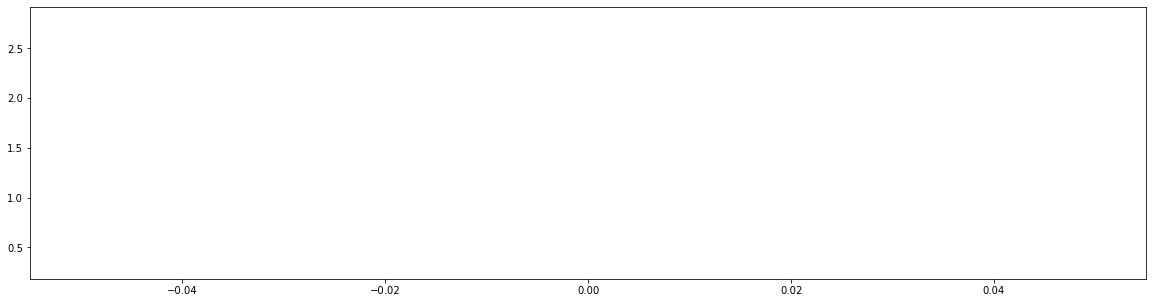

In [82]:
plt.figure(figsize=(20,5))
for optimizer in optimizers_list:
    model.compile(optimizer = optimizer[1], loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
    
    history = model.fit_generator(train_gen, 
                                  steps_per_epoch=1000,
                                  validation_data = (test_X, test_Y), 
                                  epochs = 50, 
                                  callbacks = callbacks_list)
      
    
    plt.plot(history.history['val_loss'])
    
plt.legend([x[0] for x in optimizers_list], loc='upper right')
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('optimizer_selection.png', bbox_inches='tight')

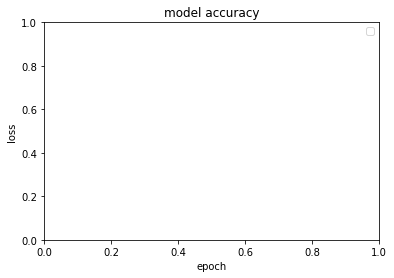

<Figure size 432x288 with 0 Axes>

In [84]:
model.load_weights(weight_path)

In [85]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 72s 2s/step


In [86]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(pred_Y,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: Dx: 26.86%, PDx: 39.88%
Cardiomegaly: Dx: 7.13%, PDx: 13.41%
Consolidation: Dx: 9.47%, PDx: 6.71%
Edema: Dx: 5.57%, PDx: 3.69%
Effusion: Dx: 28.32%, PDx: 36.81%
Emphysema: Dx: 4.39%, PDx: 1.86%
Fibrosis: Dx: 4.10%, PDx: 1.34%
Infiltration: Dx: 38.96%, PDx: 29.82%
Mass: Dx: 11.82%, PDx: 6.11%
Nodule: Dx: 12.40%, PDx: 10.59%
Pleural_Thickening: Dx: 7.42%, PDx: 2.65%
Pneumonia: Dx: 3.91%, PDx: 5.05%
Pneumothorax: Dx: 11.91%, PDx: 3.87%


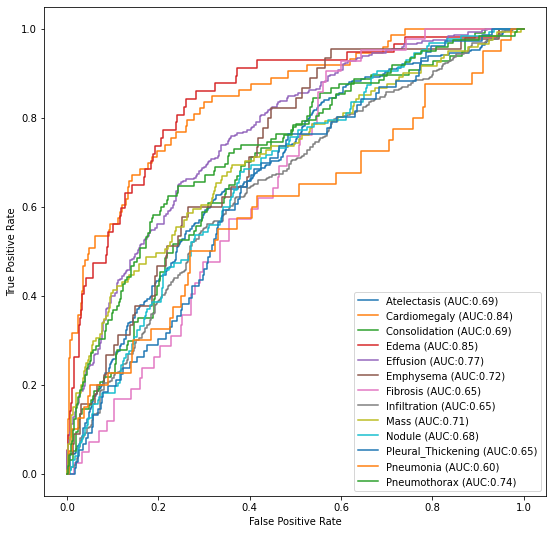

In [87]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

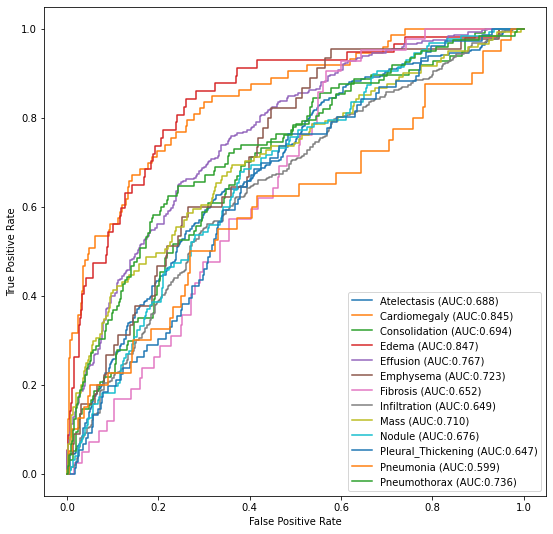

In [89]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.3f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

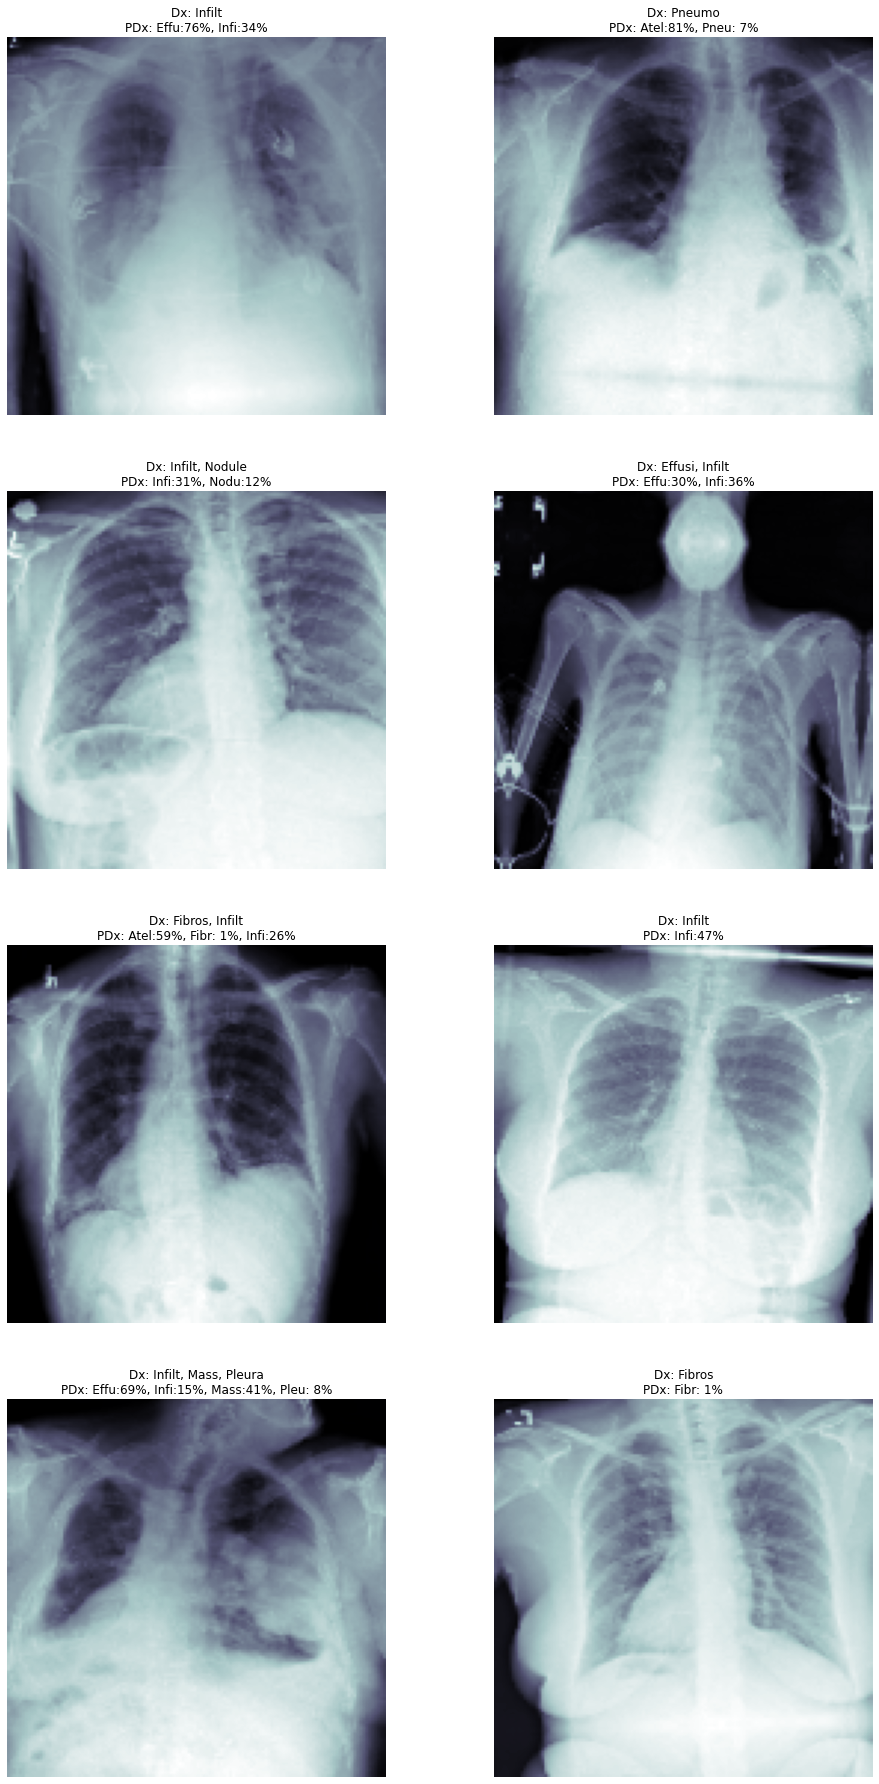

In [88]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')


In [91]:
model.fit_generator(train_gen, 
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)


C:\Users\GHOST\AppData\Local\Temp\ipykernel_5760\3269245172.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen,


Epoch 1/10
100/100 [==============================] - 490s 5s/step - loss: 0.3043 - binary_accuracy: 0.8793 - mae: 0.1791 - val_loss: 0.3127 - val_binary_accuracy: 0.8734 - val_mae: 0.1806
Epoch 2/10
100/100 [==============================] - 490s 5s/step - loss: 0.3050 - binary_accuracy: 0.8794 - mae: 0.1812 - val_loss: 0.3111 - val_binary_accuracy: 0.8736 - val_mae: 0.1830
Epoch 3/10
100/100 [==============================] - 491s 5s/step - loss: 0.3119 - binary_accuracy: 0.8750 - mae: 0.1847 - val_loss: 0.3104 - val_binary_accuracy: 0.8737 - val_mae: 0.1850
Epoch 4/10
100/100 [==============================] - 490s 5s/step - loss: 0.3123 - binary_accuracy: 0.8763 - mae: 0.1857 - val_loss: 0.3103 - val_binary_accuracy: 0.8733 - val_mae: 0.1858
Epoch 5/10
100/100 [==============================] - 491s 5s/step - loss: 0.3121 - binary_accuracy: 0.8745 - mae: 0.1866 - val_loss: 0.3102 - val_binary_accuracy: 0.8739 - val_mae: 0.1862
Epoch 6/10
100/100 [==============================] - 4

In [92]:
model.save("D:/weights.best.hdf5")

In [93]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 35s 1s/step


In [94]:
# look at how often the algorithm predicts certain diagnoses 
for c_label, p_count, t_count in zip(all_labels, 
                                     100*np.mean(pred_Y,0), 
                                     100*np.mean(test_Y,0)):
    print('%s: Dx: %2.2f%%, PDx: %2.2f%%' % (c_label, t_count, p_count))

Atelectasis: Dx: 26.86%, PDx: 24.84%
Cardiomegaly: Dx: 7.13%, PDx: 6.21%
Consolidation: Dx: 9.47%, PDx: 10.29%
Edema: Dx: 5.57%, PDx: 4.73%
Effusion: Dx: 28.32%, PDx: 28.49%
Emphysema: Dx: 4.39%, PDx: 5.57%
Fibrosis: Dx: 4.10%, PDx: 3.67%
Infiltration: Dx: 38.96%, PDx: 39.56%
Mass: Dx: 11.82%, PDx: 12.66%
Nodule: Dx: 12.40%, PDx: 12.73%
Pleural_Thickening: Dx: 7.42%, PDx: 7.42%
Pneumonia: Dx: 3.91%, PDx: 3.38%
Pneumothorax: Dx: 11.91%, PDx: 11.67%


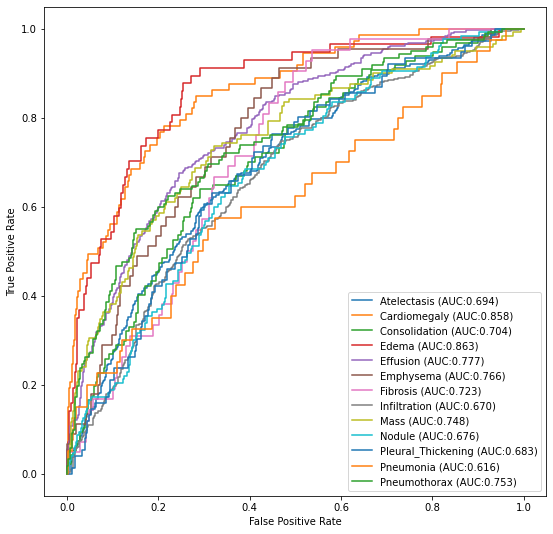

In [95]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.3f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')

In [96]:
model.load_weights(weight_path)

In [97]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 35s 1s/step


Better accurracy

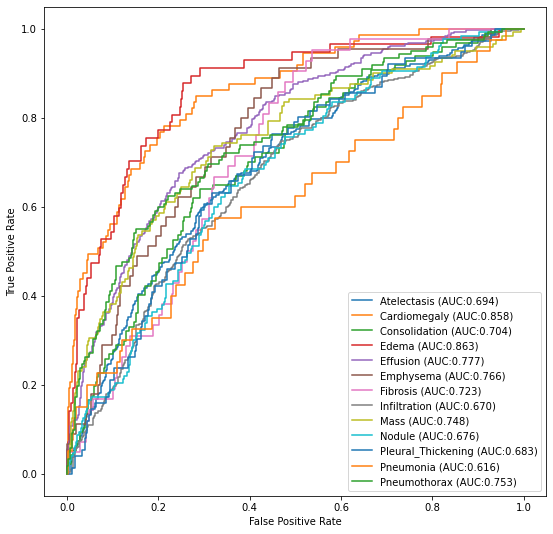

In [98]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.3f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')


final accuracy

In [105]:
model.fit_generator(train_gen, 
                                  steps_per_epoch = 100,
                                  validation_data =  (test_X, test_Y), 
                                  epochs = 10, 
                                  callbacks = callbacks_list)


C:\Users\GHOST\AppData\Local\Temp\ipykernel_5760\3959655960.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_gen,


Epoch 1/10
100/100 [==============================] - 498s 5s/step - loss: 0.3053 - binary_accuracy: 0.8769 - mae: 0.1841 - val_loss: 0.3096 - val_binary_accuracy: 0.8746 - val_mae: 0.1856
Epoch 2/10
100/100 [==============================] - 519s 5s/step - loss: 0.3051 - binary_accuracy: 0.8781 - mae: 0.1833 - val_loss: 0.3097 - val_binary_accuracy: 0.8742 - val_mae: 0.1853
Epoch 3/10
100/100 [==============================] - 498s 5s/step - loss: 0.3070 - binary_accuracy: 0.8772 - mae: 0.1844 - val_loss: 0.3096 - val_binary_accuracy: 0.8743 - val_mae: 0.1855
Epoch 4/10
100/100 [==============================] - 493s 5s/step - loss: 0.3078 - binary_accuracy: 0.8772 - mae: 0.1845 - val_loss: 0.3095 - val_binary_accuracy: 0.8742 - val_mae: 0.1862
Epoch 5/10
100/100 [==============================] - 489s 5s/step - loss: 0.3059 - binary_accuracy: 0.8775 - mae: 0.1842 - val_loss: 0.3094 - val_binary_accuracy: 0.8747 - val_mae: 0.1858
Epoch 6/10
100/100 [==============================] - 4

In [106]:
model.save("D:/weights.best.hdf5")

In [107]:
model.save("D:/weights_best_final.hdf5")

In [108]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 35s 1s/step


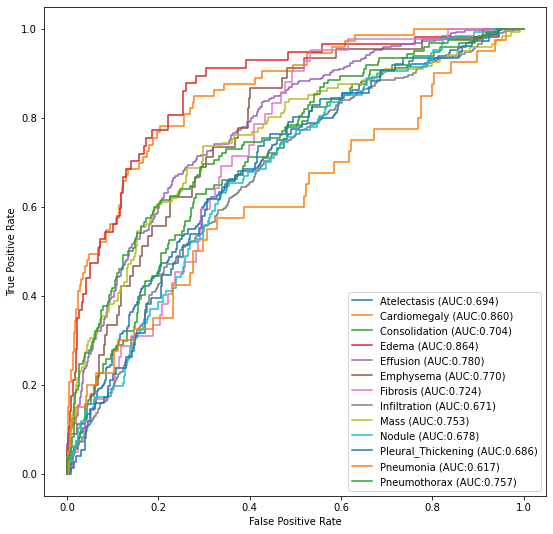

In [109]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.3f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('trained_net.png')


In [3]:
print("areas under the curve : {} \n for all {} classes".format(auc,len(auc)))

NameError: name 'auc' is not defined

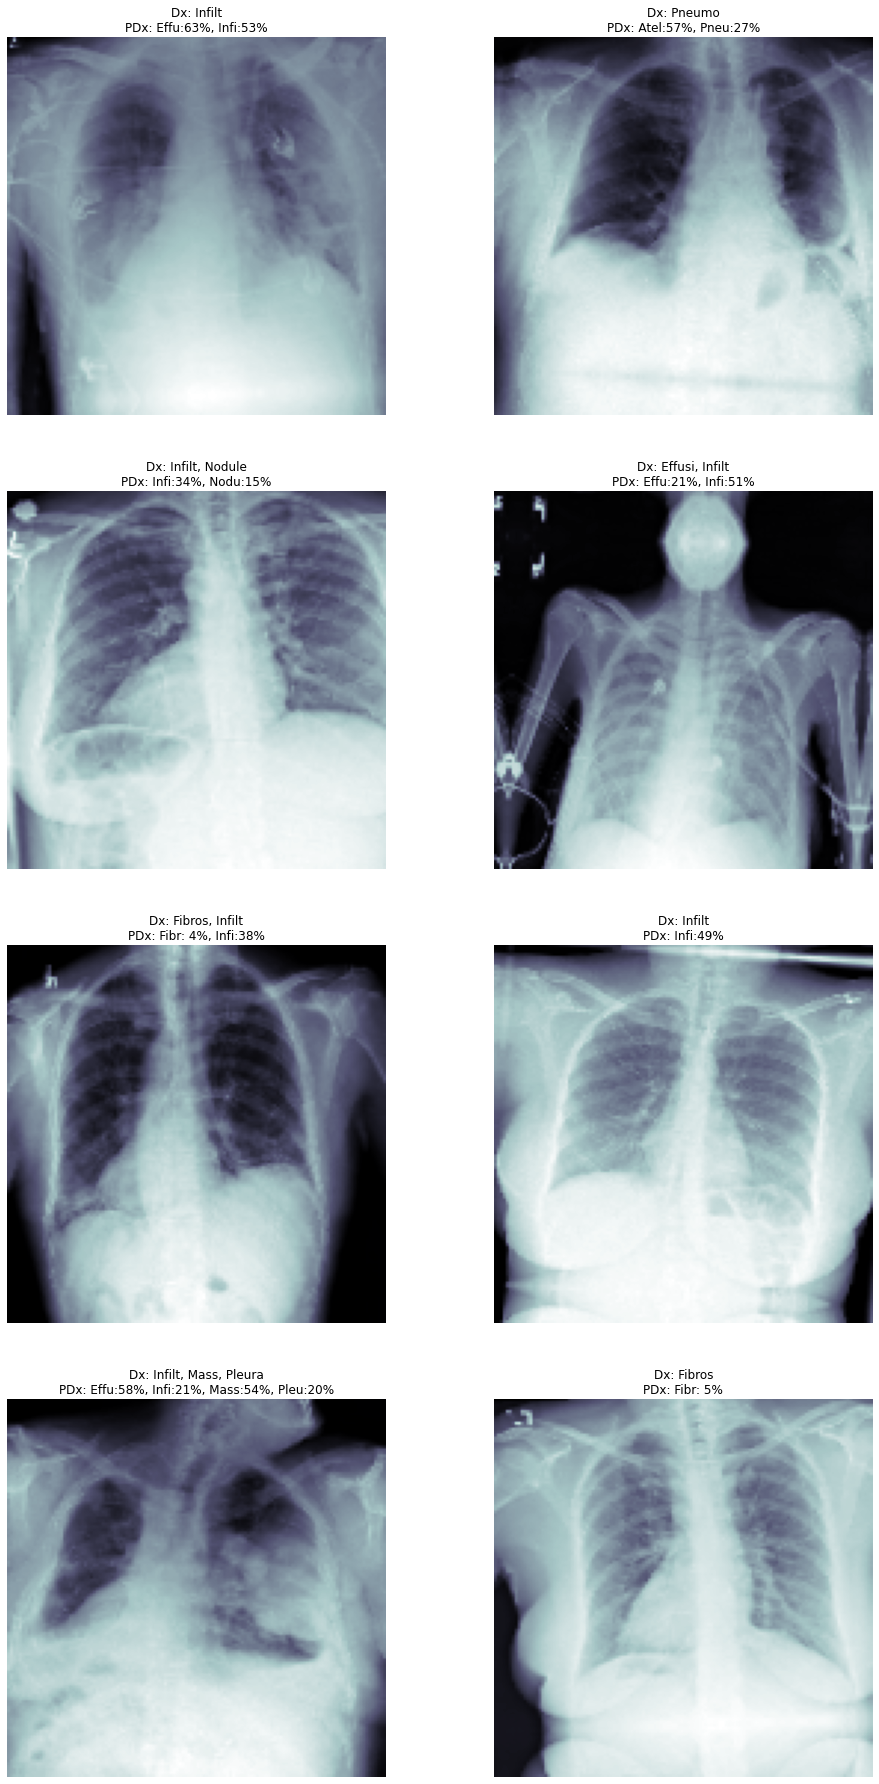

In [110]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

first accuracy

In [65]:
for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 26.86%
Cardiomegaly: 7.13%
Consolidation: 9.47%
Edema: 5.57%
Effusion: 28.32%
Emphysema: 4.39%
Fibrosis: 4.10%
Infiltration: 38.96%
Mass: 11.82%
Nodule: 12.40%
Pleural_Thickening: 7.42%
Pneumonia: 3.91%
Pneumothorax: 11.91%


In [66]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 41s 1s/step


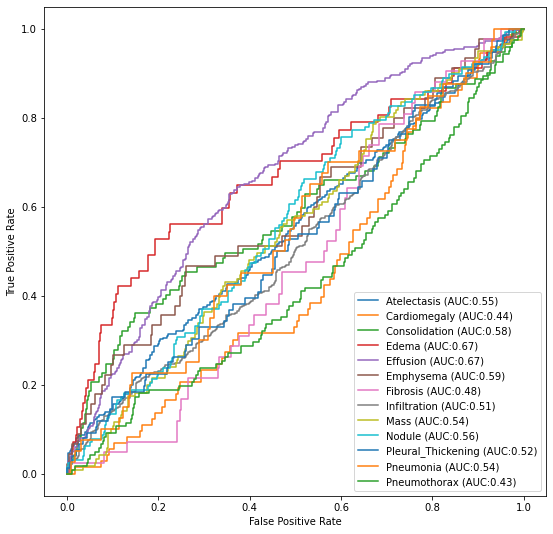

In [67]:

from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    fpr, tpr, thresholds = roc_curve(test_Y[:,idx].astype(int), pred_Y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
fig.savefig('barely_trained_net.png')

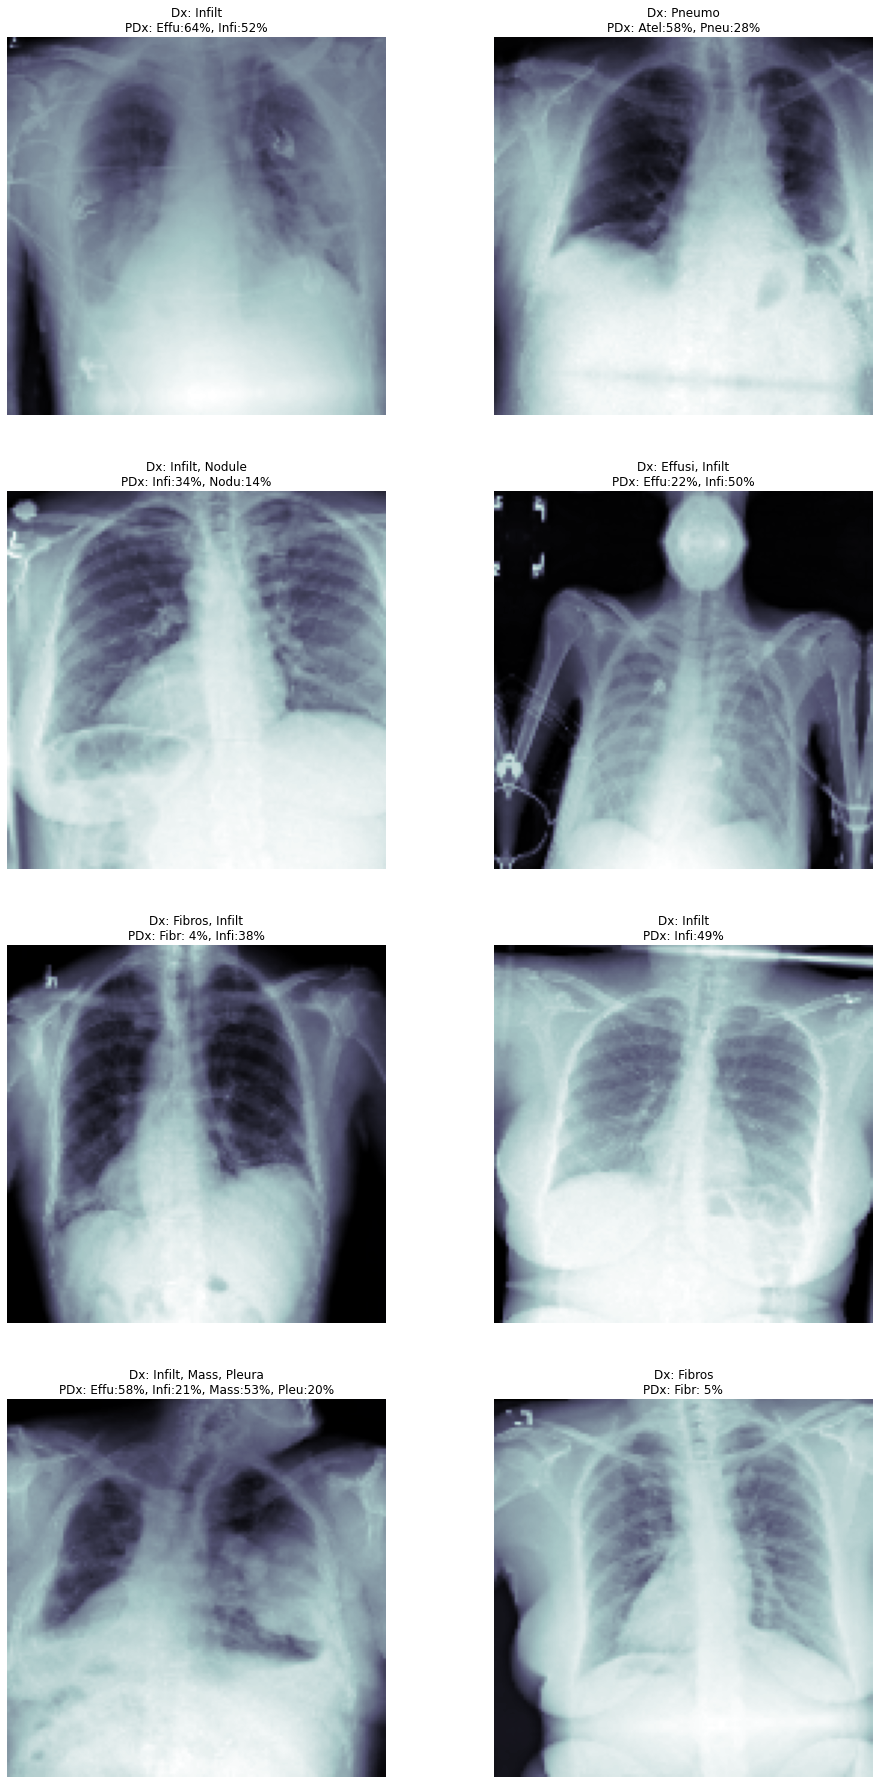

In [102]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels, 
                                                                  test_Y[idx]) 
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels, 
                                                                  test_Y[idx], pred_Y[idx]) 
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

In [104]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_image(image_path, target_size=(128, 128)):
    # Load the image from the path and resize it to the target size
    img = load_img(image_path, target_size=target_size, color_mode='rgb')
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (e.g., normalization)
    img_array /= 255.0  # assuming normalization was done during training
    return img_array

def make_prediction(model, image_path, labels):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)
    # Make prediction using the model
    prediction = model.predict(img_array)
    # Post-process the prediction to obtain the predicted labels
    predicted_labels = [labels[i] for i in range(len(labels)) if prediction[0][i] > 0.5]
    return predicted_labels

# Example usage:
# Assuming 'multi_disease_model' and 'all_labels' are defined and the model is trained
image_path = "D:/WhatsApp Image 2024-03-18 at 10.24.42_0fc973e5.jpg"
predicted_labels = make_prediction(model, image_path, all_labels)
print("Predicted labels:", predicted_labels)


1/1 [==============================] - 0s 130ms/step
Predicted labels: []


In [138]:
# Binary accuracies for each epoch
binary_accuracies = [0.8769, 0.8781, 0.8772, 0.8772, 0.8775, 0.8754, 0.8754, 0.8777, 0.8763, 0.8776]

# Calculate the average binary accuracy
average_accuracy = sum(binary_accuracies) / len(binary_accuracies)

print("Average Binary Accuracy:", average_accuracy)


Average Binary Accuracy: 0.87693
